In [1]:
print("<<START>> 1)Data pre-processing step <<START>>")

#**********Import the necessary libraries**********
print("<<START>> i)Import the necessary libraries <<START>>")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#**********Linear classification model - SVM Linear**********
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
print("<<END>> Import the necessary libraries <<END>>")

#**********Import the dataset**********
print("<<START>> Import the dataset <<START>> ")
url="https://raw.githubusercontent.com/Manohar11/Machine-Learning/master/Classification%20models/Datasets/iris.data"
headers = ['sepal_length', 'sepal width', 'petal length','petal width', 'class']
dataset=pd.read_csv(url, sep= ",", header= None, names = headers, index_col= False)

#**********Matrix of features - Independent variables**********
X = dataset[['sepal_length', 'sepal width', 'petal length','petal width']]

#**********Dependent variable**********
y = dataset['class']
print("<<END>> Import the dataset <<END>> ")

#**********Handling the missing values**********
dataset.isnull().any()

#**********Handling the categorical data**********
# No categoricals on Independent Variables

# Exist categorical data on dependent variable
labelENC_y = LabelEncoder()
y[:] = labelENC_y.fit_transform(y[:])

#**********Splitting the dataset into the Training set and Test set**********
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#**********Feature scaling**********
#*** Features are in scaled and some of the algorithms can handle internally

print("<<END>> 1)Data pre-processing step <<END>>")

<<START>> 1)Data pre-processing step <<START>>
<<START>> i)Import the necessary libraries <<START>>
<<END>> Import the necessary libraries <<END>>
<<START>> Import the dataset <<START>> 
<<END>> Import the dataset <<END>> 
<<END>> 1)Data pre-processing step <<END>>


In [2]:
print("<<START>> 2)Applying PCA step <<START>>")

#**********Applying PCA**********
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("PCA Explained variance =", explained_variance)

print("<<END>> 2)Applying PCA step <<END>>")

<<START>> 2)Applying PCA step <<START>>
PCA Explained variance = [0.92742408 0.05243402]
<<END>> 2)Applying PCA step <<END>>


In [3]:
print("<<START>> 3)Fitting machine learning model <<START>>")

#**********Fitting machine learning model to the Training set**********
model = SVC(C = 1.0, kernel="rbf", gamma="auto")
print("Fitting the training dataset using '{}' model".format("Support Vector Machine"))
classifier = model
classifier.fit(X_train, y_train)

print("<<END>> 3)Fitting machine learning model <<END>>")

<<START>> 3)Fitting machine learning model <<START>>
Fitting the training dataset using 'Support Vector Machine' model
<<END>> 3)Fitting machine learning model <<END>>


In [4]:
print("<<START>> 4)Evaluating model performance <<START>>")

#**********Predicting the Test set results**********
y_pred = classifier.predict(X_test)

#**********Making the Confusion Matrix**********
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix",cm)

#**********Retrieving classification report**********
print(classification_report(y_test, y_pred,target_names=['setosa', 'versicolor', 'virginica']))

print("<<END>> 4)Evaluating model performance <<END>>")

<<START>> 4)Evaluating model performance <<START>>
Confusion matrix [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.94      0.97        16
  virginica       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38

<<END>> 4)Evaluating model performance <<END>>


In [5]:
print("<<START>> 5)Applying k-Fold Cross Validation <<START>>")

#**********Applying k-Fold Cross Validation**********
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("K-Fold cross validation accuracy mean = ",accuracies.mean())
print("K-Fold cross validation accuracy std = ",accuracies.std())

print("<<END>> 5)Applying k-Fold Cross Validation <<END>>")

<<START>> 5)Applying k-Fold Cross Validation <<START>>
K-Fold cross validation accuracy mean =  0.9616666666666667
K-Fold cross validation accuracy std =  0.09069178573608527
<<END>> 5)Applying k-Fold Cross Validation <<END>>


In [6]:
print("<<START>> 6)Applying Grid Search <<START>>")

#**********Applying Grid Search to find the best model and the best parameters**********
classifier1 = SVC()
parameters = [{"C": [0.1, 1, 10, 100, 1000], "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}]
grid_search = GridSearchCV(estimator = classifier1,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)					   
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
print("K- FOLD Best accuracy = ", best_accuracy)
best_parameters = grid_search.best_params_
print("K- FOLD Best parameters = ", best_parameters)

print("<<END>> 6)Applying Grid Search <<END>>")

<<START>> 6)Applying Grid Search <<START>>
K- FOLD Best accuracy =  0.9642857142857143
K- FOLD Best parameters =  {'C': 0.1, 'kernel': 'linear'}
<<END>> 6)Applying Grid Search <<END>>


<<START>> 7)Visualizing the Test set results <<START>>


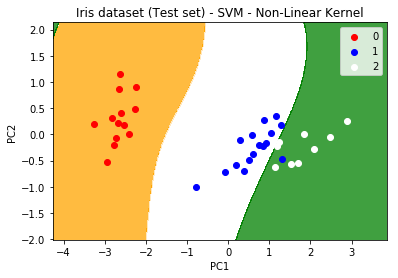

<<END>> 7)Visualizing the Test set results <<END>>


In [7]:
print("<<START>> 7)Visualizing the Test set results <<START>>")

#**********Visualizing the Test set results**********
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'white', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'white'))(i), label = j)
plt.title('Iris dataset (Test set) - SVM - Non-Linear Kernel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

print("<<END>> 7)Visualizing the Test set results <<END>>")